<a href="https://colab.research.google.com/github/andremarinho17/data_projects/blob/master/Analisando_os_Dados_do_Airbnb_Paris.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análise dos Dados do Airbnb - *Paris*

O [Airbnb](https://www.airbnb.com.br/) já é considerado como sendo a **maior empresa hoteleira da atualidade**. Ah, o detalhe é que ele **não possui nenhum hotel**!

Conectando pessoas que querem viajar (e se hospedar) com anfitriões que querem alugar seus imóveis de maneira prática, o Airbnb fornece uma plataforma inovadora para tornar essa hospedagem alternativa.

No final de 2018, a Startup fundada 10 anos atrás, já havia **hospedado mais de 300 milhões** de pessoas ao redor de todo o mundo, desafiando as redes hoteleiras tradicionais.

Uma das iniciativas do Airbnb é disponibilizar dados do site, para algumas das principais cidades do mundo. Por meio do portal [Inside Airbnb](http://insideairbnb.com/get-the-data.html), é possível baixar uma grande quantidade de dados para desenvolver projetos e soluções de *Data Science*.

<center><img alt="Analisando Airbnb" width="10%" src="https://www.area360.com.au/wp-content/uploads/2017/09/airbnb-logo.jpg"></center>

**Neste *notebook*, irei analisar os dados referentes à cidade Paris, e ver quais insights podem ser extraídos a partir de dados brutos.**
<br>
<p align="center"><img src="https://raw.githubusercontent.com/andremarinho17/imagens/main/2.png" height="500px"></p>

<br>

Segundo o site [Melhores Destinos](https://www.melhoresdestinos.com.br/cidades-mais-visitadas-do-mundo.html), a incrível Paris ficou entre os 10 lugares mais visitados do mundo em 2019, último ano em que as viagens estavam acontecendo normalmente antes da pandemia da COVID-19. A cidade tem diversos pontos turísticos, como a Torre Eiffel, a avenida Champs-Elysées, o museu do Louvre, o arco do Triunfo, etc. Para se ter uma ideia, [Paris bateu o recorde de turistas em 2018](https://www.em.com.br/app/noticia/internacional/2019/02/14/interna_internacional,1030621/paris-volta-a-bater-recorde-de-turistas-internacionais-em-2018.shtml) e só o museu do Louvre foi [visitado por 9,6 milhões de pessoas em 2019](https://gauchazh.clicrbs.com.br/comportamento/viagem/noticia/2020/01/louvre-recebeu-96-milhoes-de-visitantes-em-2019-ck4yaulj501b001oca4g6jmqw.html#:~:text=Em%202018%2C%20o%20Louvre%20recebeu,do%20museu%20da%20capital%20francesa.).

Além disso, a cidade é muito bem elogiada por seus restaurantes e outros lugares para se visitar. Recomendo fortemente [esta série](https://www.youtube.com/watch?v=-A-t_fQ1CY0&list=PLGG0oAVEdblywRfs7TyEwg5zkbLBSTQz5) para quem quiser conhecê-la melhor. 

Como é uma cidade muito visitada, é importante obter informações à respeito dos imóveis. Imagine que você queira visita-la, mas não tem nenhuma informação sobre preço das diárias dos hoteis, quantos dias ficar na cidade, quais os mais caros ou mais baratos, etc. Sendo assim, uma análise exploratória dos dados se faz crucial. Este é o objetivo do presente projeto.

## Obtenção dos Dados

Todos os dados utilizados neste projeto foram obtidos a partir do [Inside Airbnb](http://insideairbnb.com/get-the-data.html) . Detalhe que esta é a versão resumida do dataset, disponibilizada pelo próprio portal.

In [56]:
# instalando algumas ferramentas necessárias
!pip install pywaffle -q

In [57]:
!pip install wordcloud -q

In [58]:
# importar os pacotes necessarios
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pywaffle import Waffle
import numpy as np
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import nltk
from nltk.corpus import stopwords

%matplotlib inline

In [59]:
# importar o arquivo listings.csv para um DataFrame
df = pd.read_csv("http://data.insideairbnb.com/france/ile-de-france/paris/2020-12-14/visualisations/listings.csv")

## Análise dos Dados

Aqui, inicio a análise dos dados do dataset, na busca de obter informações valiosas para quem quiser visitar a cidade francesa. 

**Dicionário das variáveis**

* `id` - número de id gerado para identificar o imóvel
* `name` - nome da propriedade anunciada
* `host_id` - número de id do proprietário (anfitrião) da propriedade
* `host_name` - Nome do anfitrião
* `neighbourhood_group` - esta coluna não contém nenhum valor válido
* `neighbourhood` - nome do bairro
* `latitude` - coordenada da latitude da propriedade
* `longitude` - coordenada da longitude da propriedade
* `room_type` - informa o tipo de quarto que é oferecido
* `price` - preço para alugar o imóvel
* `minimum_nights` - quantidade mínima de noites para reservar
* `number_of_reviews` - número de reviews que a propriedade possui
* `last_review` - data do último review
* `reviews_per_month` - quantidade de reviews por mês
* `calculated_host_listings_count` - quantidade de imóveis do mesmo anfitrião
* `availability_365` - número de dias de disponibilidade dentro de 365 dias


Antes de iniciar qualquer análise, vou verificar como está o *dataset*, analisando as 5 primeiras entradas.

In [60]:
# mostrar as 5 primeiras entradas
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2577,Loft for 4 by Canal Saint Martin,2827,Karine,NaN,Entrepôt,48.86993,2.36251,Entire home/apt,125,3,1,2019-01-02,0.04,1,364
1,3109,zen and calm,3631,Anne,NaN,Observatoire,48.83349,2.31852,Entire home/apt,60,2,9,2019-10-24,0.19,1,2
2,4890,Quiet Historic & Cute +Free Cruise,6792,Ryan Of Cobblestone,NaN,Temple,48.86409,2.35651,Entire home/apt,69,5,23,2020-09-07,0.21,14,67
3,5396,Explore the heart of old Paris,7903,Borzou,NaN,Hôtel-de-Ville,48.85207,2.35871,Entire home/apt,62,1,231,2020-11-05,1.65,1,90
4,7397,MARAIS - 2ROOMS APT - 2/4 PEOPLE,2626,Franck,NaN,Hôtel-de-Ville,48.85758,2.35275,Entire home/apt,53,15,269,2020-08-15,2.28,3,348


Para um melhor entendimento da análise, irei criar uma nova coluna no DataFrame com o valor do preço convertido de Euros para Reais.

In [61]:
# Criando função de conversão

def converteReais(registro):
  return float(registro['price']) * 6.45

In [62]:
# Criando coluna calculada

df['Preço em R$'] = df.apply(converteReais, axis=1)

### **Q1. Quantos atributos (variáveis) e quantas entradas o nosso conjunto de dados possui? Quais os tipos das variáveis?**

In [63]:
# identificar o volume de dados do DataFrame
print("Entradas:\t {}".format(df.shape[0]))
print("Variáveis:\t {}".format(df.shape[1]))

# verificar as 5 primeiras entradas do dataset
display(df.dtypes)

Entradas:	 65917
Variáveis:	 17


id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group               float64
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
Preço em R$                       float64
dtype: object

É possível notar que o dataset possui 65.917 propriedades e 17 variáveis dos tipos inteiro, objeto e float.

### **Q2. Qual a porcentagem de valores ausentes no *dataset*?**

Se faz necessário averiguar a qualidade do conjunto de dados e fazer as limpezas necessárias. 

In [64]:
# ordenar em ordem decrescente as variáveis por seus valores ausentes
(df.isnull().sum() / df.shape[0]).sort_values(ascending=False)

neighbourhood_group               1.000000
reviews_per_month                 0.237996
last_review                       0.237996
name                              0.000971
host_name                         0.000425
Preço em R$                       0.000000
latitude                          0.000000
host_id                           0.000000
neighbourhood                     0.000000
room_type                         0.000000
longitude                         0.000000
availability_365                  0.000000
price                             0.000000
minimum_nights                    0.000000
number_of_reviews                 0.000000
calculated_host_listings_count    0.000000
id                                0.000000
dtype: float64

É possível perceber que a coluna `neighbourhood_group` não possui valores, ou seja, todos estão faltantes. Ao passo que as variáveis `reviews_per_month` e `last_review` estão com 23% dos valores ausentes.

### **Q3. Qual o tipo de distribuição das variáveis?** 

Para verificar a distribuição, irei plotar o histograma das variáveis.

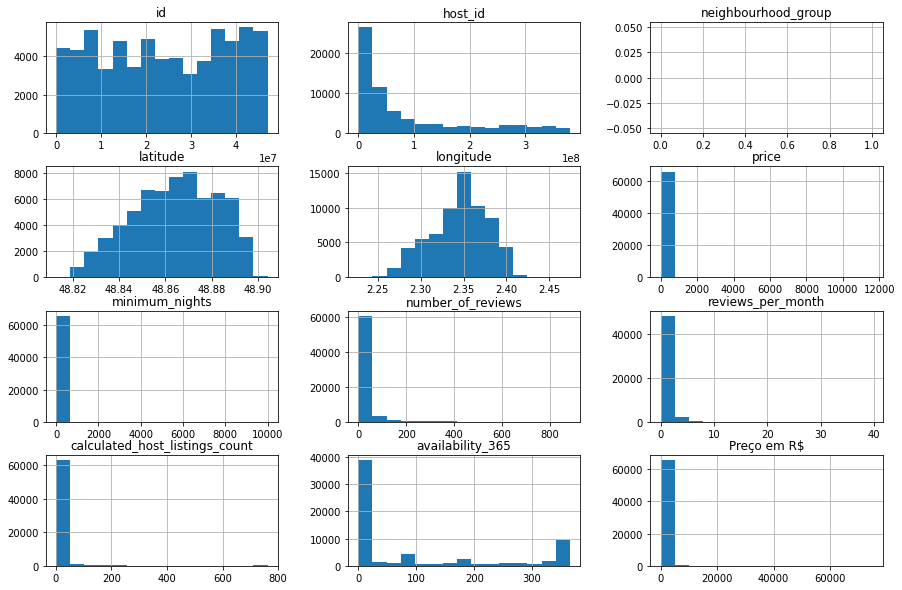

In [65]:
# plotar o histograma das variáveis numéricas
df.hist(bins=15, figsize=(15,10))
plt.show()

Ao verificar as distribuiçõs, nota-se que a maioria é assimétrica a direita, possivelmente com valores discrepantes em relação as variáveis `price`, `Preço em R$`, `minimum_nights` e `calculated_host_listings_count`. Para confirmar se os *outliers*, vou realizar uma análise estatística descritiva das variáveis e plotar seus respectivos boxplots. 

### **Q3. Há outliers presentes?**

In [66]:
df[['price', 'Preço em R$', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
    'calculated_host_listings_count', 'availability_365']].describe()

,price,Preço em R$,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,65917.000000,65917.000000,65917.000000,65917.000000,50229.000000,65917.000000,65917.000000
mean,114.280201,737.107296,5.656113,18.783394,0.689335,16.427098,96.354173
std,220.155923,1420.005706,44.279940,40.678117,0.983954,86.017717,137.362947
min,0.000000,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,59.000000,380.550000,1.000000,1.000000,0.130000,1.000000,0.000000
50%,80.000000,516.000000,2.000000,5.000000,0.360000,1.000000,0.000000
75%,120.000000,774.000000,4.000000,18.000000,0.870000,2.000000,179.000000
max,11600.000000,74820.000000,9999.000000,882.000000,39.620000,762.000000,365.000000


A partir da tabela acima, é possível confirmar que há outliers, pois observe que 75% dos preços do aluguél estão abaixo de R$ 774, no entanto, o máximo é  78.820 reais. Note também que o mínimo de noites está muito acima do total de um ano. A seguir, vou plotar os boxplots das duas variáveis em questão (`Preço em R$` e `minimum_nights`) para visualizar melhor os outliers. 

**Boxplot da variável minimum_nights**

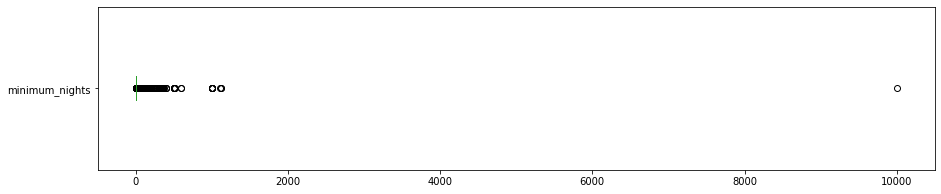

minimum_nights: valores acima de 30:
906 entradas
1.3745%


In [67]:
df.minimum_nights.plot(kind='box', vert=False, figsize=(15, 3))
plt.show()

print("minimum_nights: valores acima de 30:")
print("{} entradas".format(len(df[df.minimum_nights > 30])))
print("{:.4f}%".format((len(df[df.minimum_nights > 30]) / df.shape[0])*100))

É possível observar que acima de 30 noites, há alguns valores discrepantes. O máximo, que é 11600, está bem discrepante em relação aos demais.

**Boxplot da variável Preço em R$**

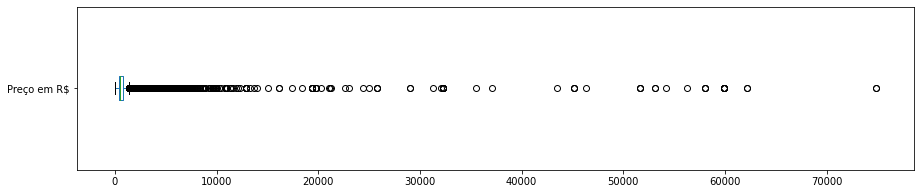


price: valores acima de 1500
4548 entradas
6.8996%


In [68]:
df['Preço em R$'].plot(kind='box', vert=False, figsize=(15, 3),)
plt.show()

# ver quantidade de valores acima de 1500 para price
print("\nprice: valores acima de 1500")
print("{} entradas".format(len(df[df['Preço em R$'] > 1500])))
print("{:.4f}%".format((len(df[df['Preço em R$'] > 1500]) / df.shape[0])*100))


É possível observar que acima de 1000 noites, há alguns valores discrepantes. O máximo, que é R$ 74.820, está bem discrepante em relação aos demais.

Tratados os *outliers* do conjunto de dados, irei plotar novamente o histograma para verificar a distribuição das variáveis com mais clareza.

[]

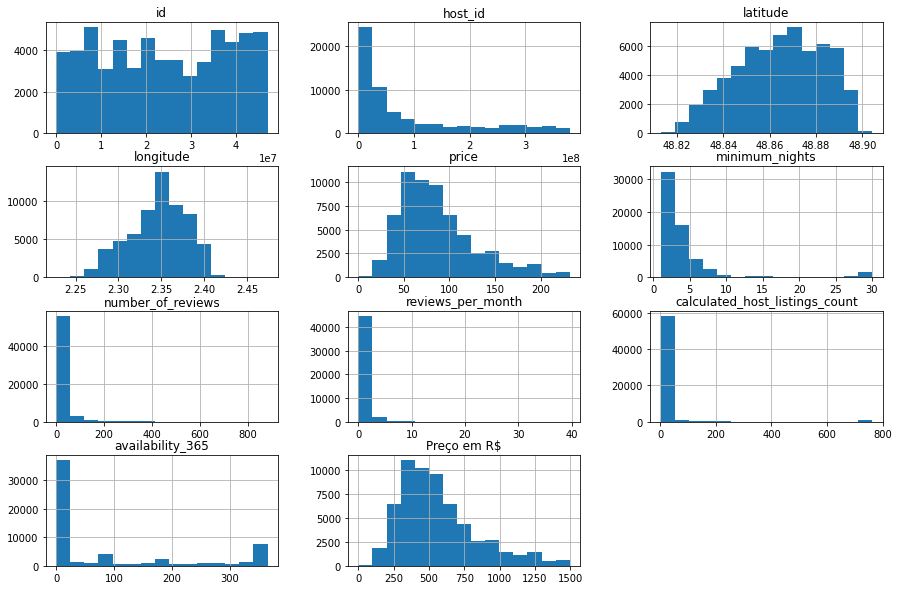

In [69]:
df_clean = df.copy()
df_clean.drop(df_clean[df_clean['Preço em R$'] > 1500].index, axis=0, inplace=True)
df_clean.drop(df_clean[df_clean.price > 1000].index, axis=0, inplace=True)
df_clean.drop(df_clean[df_clean.minimum_nights > 30].index, axis=0, inplace=True)

df_clean.drop('neighbourhood_group', axis=1, inplace=True)

df_clean.hist(bins=15, figsize=(15,10))

plt.plot()

É possível observar que os preços dos imóveis em Paris estão, em maior parte, no intervalo de 270 e 800 reais. Há menos imóveis com preços maiores do que isto. 

Com os dados limpos, finalmente é possível extrair melhor as informações valiosas para quem quer conhecer Paris. A seguir, farei algumas perguntas aos dados com este objetivo.

### **Q4. Qual a média dos preços de aluguel?**

In [70]:
# ver a média da coluna `price``
print("Média em Euros: " + str(df_clean['price'].mean()))
print("Média em Reais: " + str(df_clean['Preço em R$'].mean()))

Média em Euros: 87.14391887428157
Média em Reais: 562.0782767391477


A média dos preços do aluguel é equivalente a 87,14 euros, o que equivale a  562 reais. 

### **Q5. Qual o tipo de imóvel mais alugado no Airbnb?**

A coluna da variável `room_type` indica o tipo de locação que está anunciada no Airbnb. Se você já alugou no site, sabe que existem opções de apartamentos/casas inteiras, apenas o aluguel de um quarto ou mesmo dividir o quarto com outras pessoas.

A seguir, irei verificar o tipo dos imóveis mais alugados na cidade de Paris pelo site. 

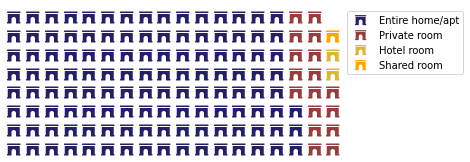

Entire home/apt    51924
Private room        7193
Hotel room          1022
Shared room          409
Name: room_type, dtype: int64


In [71]:
# mostrar a quantidade de cada tipo de imóvel disponível

data = dict(df_clean['room_type'].value_counts())

fig = plt.figure(
    FigureClass=Waffle,
    rows=8,
    columns=18,
    colors=("#232066", "#983D3D", "#DCB732", "#FFA500"),
    values=data, icons='archway', icon_size=12,
    legend={'loc': 'upper left', 'bbox_to_anchor': (1,1)},
    icon_legend=True
)

fig.set_tight_layout(False)
plt.show();
print(df_clean.room_type.value_counts())

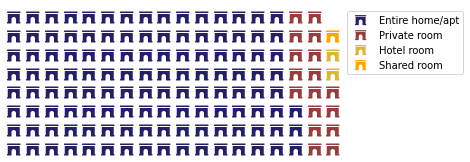

Entire home/apt    0.857568
Private room       0.118798
Hotel room         0.016879
Shared room        0.006755
Name: room_type, dtype: float64


In [72]:
# mostrar a porcentagem de cada tipo de imóvel disponível
data = dict(df_clean['room_type'].value_counts() / df_clean.shape[0])

fig = plt.figure(
    FigureClass=Waffle,
    rows=8,
    columns=18,
    colors=("#232066", "#983D3D", "#DCB732", "#FFA500"),
    values=data, icons='archway', icon_size=12,
    legend={'loc': 'upper left', 'bbox_to_anchor': (1,1)},
    icon_legend=True
)

fig.set_tight_layout(False)
plt.show();
print((df_clean['room_type'].value_counts() / df_clean.shape[0]))

É possível observar que a maioria das pessoas optam por alugar uma casa ou apartamento inteiro, pois 85,7% dos imóveis do conjunto de dados são deste tipo. O segundo tipo de imóvel mais alugado é o quarto privado, o que equivale a 11,5% e em seguida, quarto de hotel (2,11%) e quarto compartilhado (0,6%). 

### **Q6. Qual a localidade mais cara do dataset?**

Antes de fazer uma viagem, é bom ter uma ideia dos bairros mais caros ou mais baratos para estadia, o que depende da ambição de quem vai fazer o aluguél. Para extrair esta informação, vou verificar quais as localidades mais caras, caso uma pessoa queira ficar em um lugar de luxo, e as mais baratas, caso queira economizar.


**Bairros mais Caros**

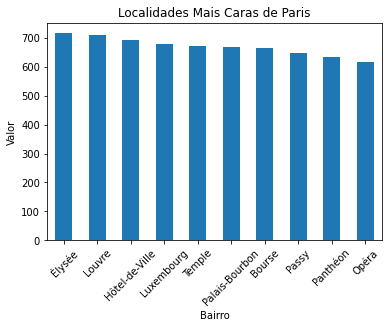

neighbourhood
Élysée            715.127199
Louvre            710.748568
Hôtel-de-Ville    692.057363
Luxembourg        679.433763
Temple            672.716958
Palais-Bourbon    666.151676
Bourse            665.934800
Passy             645.704879
Panthéon          633.731336
Opéra             617.334099
Name: Preço em R$, dtype: float64


In [78]:
# ver preços por bairros, na média
df_clean.groupby(['neighbourhood'])['Preço em R$'].mean().sort_values(ascending=False)[:10].plot(kind='bar')
plt.title('Localidades Mais Caras de Paris')
plt.xlabel('Bairro')
plt.ylabel('Valor')
plt.xticks(rotation=45)

plt.show()

print(df_clean.groupby(['neighbourhood'])['Preço em R$'].mean().sort_values(ascending=False)[:10])


Como de se esperar, entre as localidades mais caras estão Elysée (média de 1.715,12 reais a diária), Louvre (média de 710,74 reais a diária), Luxembourg (média de 692.05 reais a diária) e entre outras. No bairro Elysée, há a avenida mais famosa do país, que é a Champs-Elysées e no Louvre, temos um dos museus mais famosos do mundo, que é o Museu do Louvre. 

**Bairros mais Baratos**

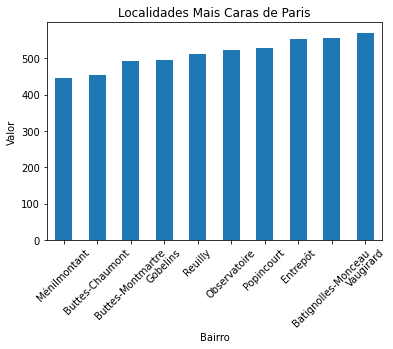

neighbourhood
Ménilmontant           446.756998
Buttes-Chaumont        453.648263
Buttes-Montmartre      492.444777
Gobelins               496.327068
Reuilly                510.455566
Observatoire           523.852174
Popincourt             526.933691
Entrepôt               553.452683
Batignolles-Monceau    555.251747
Vaugirard              569.913420
Name: Preço em R$, dtype: float64


In [79]:
# ver preços por bairros, na média
df_clean.groupby(['neighbourhood'])['Preço em R$'].mean().sort_values(ascending=True)[:10].plot(kind='bar')
plt.title('Localidades Mais Caras de Paris')
plt.xlabel('Bairro')
plt.ylabel('Valor')
plt.xticks(rotation=45)

plt.show()

print(df_clean.groupby(['neighbourhood'])['Preço em R$'].mean().sort_values(ascending=True)[:10])

Pode-se observar que, caso uma pessoa queira fazer uma viagem mais econômica, é importante fazer uma pesquisa por imóveis nos bairros acima.

Será que é possível ficar em Élysées pagando barato na diária? É o que verificarei a seguir.

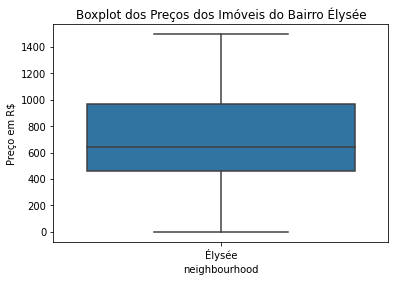

In [88]:
# plotar o boxplot
sns.boxplot(x = "neighbourhood", y="Preço em R$", data=df_clean.loc[df_clean['neighbourhood'] == 'Élysée'])
plt.title("Boxplot dos Preços dos Imóveis do Bairro Élysée")
plt.show()

Aparentemente, seria possível se hospedar em Paris no bairro Élysées mesmo pagando um valor baixo. Vou aplicar estatística descritiva para averiguar o valor exato.

In [86]:
# Aplicando estatística descritiva para ver o valor exato
df_clean['Preço em R$'].loc[df_clean['neighbourhood'] == 'Élysée'].describe()

count    1364.000000
mean      715.127199
std       325.320077
min         0.000000
25%       462.787500
50%       645.000000
75%       967.500000
max      1496.400000
Name: Preço em R$, dtype: float64

Observe que 25% dos preços dos imóveis em Élysés estão abaixo de 462 reais. Então, é possível sim se hospedar no bairro mais caro de Paris pagando pouco. Segue a relação dos bairros: 

In [95]:
# Tabela com os Imóveis mais baratos do bairro Élysée
imoveis_baratos_elysee = df_clean[df_clean['neighbourhood'] == 'Élysée'].loc[df['Preço em R$'] <= 462]

In [97]:
imoveis_baratos_elysee.head(10)

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,Preço em R$
908,596835,Beautiful and quiet Apt near Opéra,2951141,Raphaël,Élysée,48.87906,2.32019,Entire home/apt,67,1,33,2016-01-02,0.33,1,0,432.15
1110,689956,Great & Cosy flat BATIGNOLLES area!,2435563,Morgane,Élysée,48.88167,2.32228,Entire home/apt,60,7,30,2019-09-05,0.31,1,362,387.00
1447,845652,Appartement charmant sous les toits,4377714,Vincent,Élysée,48.87613,2.32341,Entire home/apt,60,2,4,2014-04-11,0.04,1,0,387.00
1968,1192028,"Delizioso ""studiò"" a 2 passi dagli Champs Elyséès",6142322,Camilla Et Alessandro,Élysée,48.87171,2.31150,Entire home/apt,50,5,2,2019-11-23,0.04,1,0,322.50
2226,1329018,Lovely single room near Champs Elysees,7211592,Happy,Élysée,48.87569,2.30718,Private room,30,1,120,2020-09-30,1.36,2,259,193.50
2277,1351571,CHAMPS-ELYSEES - COZY FLAT,1964696,Anne,Élysée,48.87132,2.31454,Entire home/apt,69,5,25,2020-10-01,0.28,1,74,445.05
2544,1528100,STUDIO CHAMPS ELYSEES paris 75008,8028452,James,Élysée,48.87403,2.30534,Private room,59,2,355,2020-03-20,4.05,1,357,380.55
2852,1827470,Charming flat in the heart of Paris,4860430,Stéphanie,Élysée,48.87423,2.32147,Private room,70,2,0,NaN,NaN,1,0,451.50
3039,1982419,STUDIO 2 STEPS FROM THE CHAMPS ELYSEES,10229194,Celine,Élysée,48.87635,2.30026,Entire home/apt,44,3,250,2020-10-04,2.93,4,180,283.80
3322,2229331,Central Paris 8 St-Lazare/Haussman,11379178,Josephine,Élysée,48.87622,2.32212,Entire home/apt,66,5,12,2014-10-26,0.15,1,0,425.70


**Mapa de Calor dos Preços dos Imóveis de Paris**

A seguir, irei plotar um mapa de calor dos preços dos imóveis da cidade de Paris.

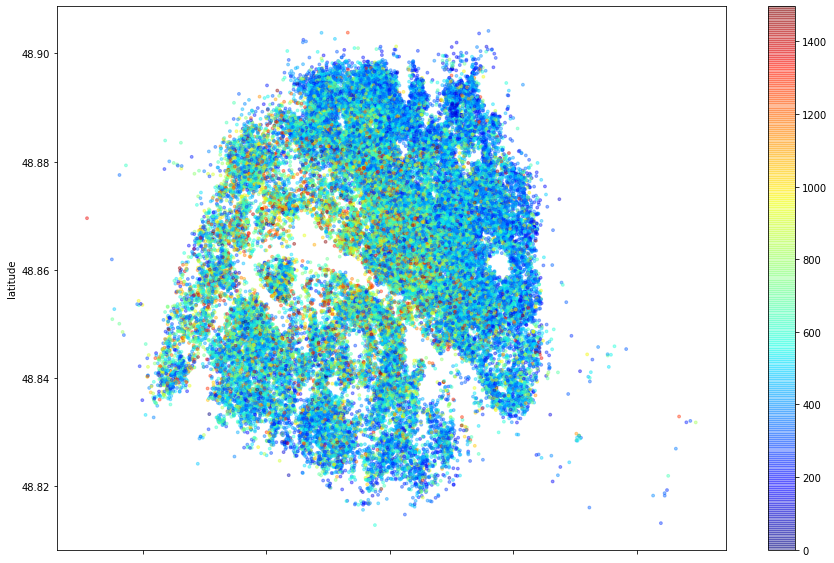

In [80]:
# plotar os imóveis pela latitude-longitude
df_clean.plot(kind="scatter", x='longitude', y='latitude', alpha=0.4, c=df_clean['Preço em R$'],
              s=8, cmap=plt.get_cmap('jet'), figsize=(15,10));

Para efeito de comparação, segue o mapa de sites turísticos de Paris, disponibilizado pela Paris Vision.


<p align="center"><img src="https://raw.githubusercontent.com/andremarinho17/imagens/main/6475.jpg" height="500px"></p>

É possível verificar que nas regiões próximas do Arco do Triunfo, Torre Eiffel e Palácio dos Inválidos, há pontos mais quentes, comprovando visualmente que esta região é a mais cara para estadia na cidade.

### **Q7. Qual é a média do mínimo de noites para aluguel (minimum_nights)?**

In [19]:
# ver a média da coluna `minimum_nights``
df_clean['minimum_nights'].mean()

3.8746971964635635

A média dos preços do mínimo de noites em um imóvel em Paris é equivalente a aproximadamente 4, o que indica que as pessoas costumam ficar em um imóvel de Paris em metade de uma semana, o que pode ser nos primeiros dias ou um fim de semana.   

### **Q8. O que há de tão valioso no bairro Élysée?**

Por quê será que o bairro Elysée é tão caro? 

Como dito anteriormente, neste bairro fica a Avenida Champs-Elysées, que é a avenida mais famosa e visitada da França! Vamos verificar um *overview* desse bairro para responder esta pergunta. Para isso, vou plotar uma núvem de palavras, utilizando o *dataset* completo disponibilizado pelo Inside Airbnb!

<p align="center"><img src="https://raw.githubusercontent.com/andremarinho17/imagens/main/florian-wehde-milUxSbp4_A-unsplash.jpg" height="500px"></p>
<p align="center"> 
Champs-Élysées. Imagem: Florian Wehde (Unsplash) </p> <br>

In [81]:
df_words = pd.read_csv("http://data.insideairbnb.com/france/ile-de-france/paris/2020-12-14/data/listings.csv.gz")

In [82]:
df_words.head()

,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,2577,https://www.airbnb.com/rooms/2577,20201214191425,2020-12-16,Loft for 4 by Canal Saint Martin,"100 m2 loft (1100 sq feet) with high ceiling, ...",NaN,https://a0.muscache.com/pictures/09da057c-0120...,2827,https://www.airbnb.com/users/show/2827,Karine,2008-09-09,"Casablanca, Grand Casablanca, Morocco","Arrivée à Casablanca il y a 4 ans, je suis amo...",NaN,NaN,67%,f,https://a0.muscache.com/im/pictures/user/17fe6...,https://a0.muscache.com/im/pictures/user/17fe6...,République,2.0,2.0,"['email', 'phone', 'reviews', 'jumio', 'govern...",t,t,NaN,Entrepôt,NaN,48.86993,2.36251,Entire loft,Entire home/apt,4,NaN,2 baths,2.0,2.0,"[""Dryer"", ""Host greets you"", ""Hot water"", ""Han...",$125.00,3,1125,3.0,3.0,1125.0,1125.0,3.0,1125.0,NaN,t,30,60,90,364,2020-12-16,1,0,0,2019-01-02,2019-01-02,100.0,10.0,10.0,10.0,10.0,10.0,10.0,NaN,f,1,1,0,0,0.04
1,3109,https://www.airbnb.com/rooms/3109,20201214191425,2020-12-17,zen and calm,<b>The space</b><br />I bedroom appartment in ...,Good restaurants<br />very close the Montparna...,https://a0.muscache.com/pictures/baeae9e2-cd53...,3631,https://www.airbnb.com/users/show/3631,Anne,2008-10-14,"Paris, Île-de-France, France",NaN,NaN,NaN,0%,f,https://a0.muscache.com/im/users/3631/profile_...,https://a0.muscache.com/im/users/3631/profile_...,Alésia,1.0,1.0,"['email', 'phone', 'facebook', 'reviews']",t,f,"Paris, Île-de-France, France",Observatoire,NaN,48.83349,2.31852,Entire apartment,Entire home/apt,2,NaN,1 bath,NaN,1.0,"[""Children\u2019s books and toys"", ""Paid parki...",$60.00,2,30,2.0,2.0,30.0,30.0,2.0,30.0,NaN,t,2,2,2,2,2020-12-17,9,0,0,2016-12-27,2019-10-24,100.0,10.0,10.0,10.0,10.0,10.0,10.0,NaN,f,1,1,0,0,0.19
2,4890,https://www.airbnb.com/rooms/4890,20201214191425,2020-12-16,Quiet Historic & Cute +Free Cruise,Stylish & Classic One bedroom apartment for up...,"Called ""Paris Next Great Neighborhood"" from Tr...",https://a0.muscache.com/pictures/b144894f-bc55...,6792,https://www.airbnb.com/users/show/6792,Ryan Of Cobblestone,2009-01-16,"Paris, Île-de-France, France",I am the owner of Cobblestone Paris Rentals\r\...,within an hour,100%,100%,f,https://a0.muscache.com/im/users/6792/profile_...,https://a0.muscache.com/im/users/6792/profile_...,Le Marais,9.0,9.0,"['email', 'phone', 'reviews', 'offline_governm...",t,t,"Paris, Ile-de-France, France",Temple,NaN,48.86409,2.35651,Entire apartment,Entire home/apt,4,NaN,1 bath,1.0,2.0,"[""Dryer"", ""Host greets you"", ""Hangers"", ""Iron""...",$69.00,5,120,5.0,5.0,1125.0,1125.0,5.0,1125.0,NaN,t,8,37,67,67,2020-12-16,23,1,0,2011-11-22,2020-09-07,95.0,10.0,9.0,10.0,10.0,10.0,10.0,NaN,f,14,14,0,0,0.21
3,5396,https://www.airbnb.com/rooms/5396,20201214191425,2020-12

In [32]:
# eliminar os valores ausentes
neighborhood_overview	 = df_words.dropna(subset=['neighborhood_overview'], axis=0)['neighborhood_overview']

In [33]:
# exemplos de overviews para os bairros do Airbnb
display(neighborhood_overview	.iloc[100])
display(neighborhood_overview	.iloc[120])

'The flat is located in the heart of historical district of Paris, near "Le jardin des plantes" and "Les Arènes de Lutece". You will enjoy wonderful and charming walks in those garden but also along "Les quais de seine", "Notre Dame", île Saint Louis, Panthéon, and all the latin district. <br />1 minute to Arènes de Lutece <br />3 minutes  to Jardin des plantes <br />10 minutes  to Panthéon <br />14 minutes to Notre Dame and île Saint Louis. <br /><br />There is a very nice market place 3 times a week at "place Monge". <br />And all the daily shops are very close from the flat (bakery, super market , butcher, etc).'

"It's cosmopolitan. It's one of the last authentic neighborhoods in Paris. It's very lively.<br />I love it!"

In [34]:
# concatenar as palavras
all_description = " ".join(s for s in neighborhood_overview	)

print("Quantidade de Palavras: {}".format(len(all_description)))

Quantidade de Palavras: 14970560


In [35]:
nltk.download('stopwords')
print(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'bo

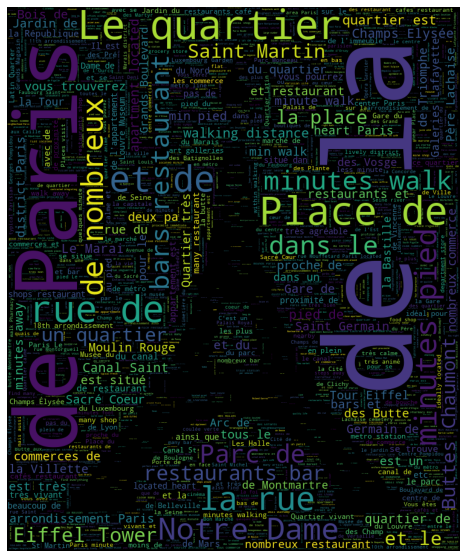

In [37]:
#lista de stopword
stop_words = set(stopwords.words('english'))
stop_words.update(["br"]) #Nosso problema tinham muitos 'br' soltos sem nenhum valor, dessa forma vamos retirá-los.

# endereço da imagem
paris_mask = np.array(Image.open("/content/silhueta-preta-da-torre-eiffel-99196136.jpg"))
   
# gerar uma wordcloud
wordcloud = WordCloud(stopwords=stop_words,
                      background_color="black",
                      width=1000, height=1000, max_words=2000,
                      mask=paris_mask, max_font_size=200,
                      min_font_size=1).generate(all_description)

# mostrar a imagem final
fig, ax = plt.subplots(figsize=(10,10))
ax.imshow(wordcloud, interpolation='bilinear')
ax.set_axis_off()

plt.imshow(wordcloud)
wordcloud.to_file("airbnb_summary_wordcloud.png")

Observe que há palavras como *de noumbreux* que em português significa numeroso, haja vista que essa região da cidade é bem movimentada. Há também outras palavras como: 
* Sacré Coeur, que é uma basílica famosa da cidade. 
* Moulin Rouge, que é um estabelecimento muito famoso. 
* Torre Eiffel, um dos pontos turísticos mais famosos do mundo.
* Notre Dame, que é a famosa e histórica Catedral
* Saint Martin, que faz referência a [Região do Canal Saint Martin em Paris]("https://dicasparis.com.br/paris/canal-saint-martin-em-paris-franca/"), um ponto turístico. 
* *Restaurants*, *bar*, pois os restaurantes e bares de Paris são bastante famosos, principalmente por causa da culinária francesa, que é uma das melhores do mundo.
* *Hearth Paris*, ou seja, o coração de Paris.


## Conclusões


Portanto, pode-se concluir que a análise de dados é importantíssima no processo de alugar um imóvel antes de realizar uma viagem a Paris, pois através dela é possível obter muitas informações valiosas dos dados  e fazer uma viagem com mais segurança e tranquilidade. Sendo possível também visitar a cidade alugando um imóvel barato no bairro mais caro, assim como economizar mais nos bairros mais baratos ou fazer uma viagem de luxo nos mais caros, e por último, verificar a média de preços e de noites que também são informações cruciais.

A núvem de palavras do bairro Élysée se fez de extrema importância para verificar porque a cidade é tão cara! Aliás, nela ou próxima dela, há diversos dos maiores pontos turísticos da França.